In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.image as mpimg
from wordcloud import WordCloud

In [3]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % 0

In [4]:
def create_wordCloud(words):
    print(words)
    x, y = np.ogrid[:2000, :2000]
    mask = (x - 1000) ** 2 + (y - 1000) ** 2 > 1000 ** 2
    mask = 255 * mask.astype(int)
    wordcloud = WordCloud(width=1280, height=1280,min_font_size=20, background_color='white', margin=0, mask=mask, color_func= grey_color_func)
    wordcloud.generate_from_frequencies(frequencies=words)
    
    plt.figure(figsize=(12.8, 12.8))

    #plt.imshow(wordcloud.recolor(color_func=grey_color_func), interpolation="bilinear")
    #plt.imshow(wordcloud.recolor(color_func= grey_color_func), interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    return plt

In [5]:
topic_word = pickle.load(open("files/4.1 topic_word_weight.pickle", 'rb'))

In [6]:
topic_word

{0: [('driver', 35213.893165643705),
  ('drive', 23362.361100926133),
  ('driving', 8551.614079522775),
  ('task', 7555.884546008273),
  ('behavior', 7329.14087564301),
  ('simulator', 5522.821807870856),
  ('study', 5080.102588605631),
  ('performance', 4773.228844762946),
  ('situation', 3864.661033775999),
  ('result', 3848.8516307995296),
  ('visual', 3459.862155393118),
  ('condition', 3453.771774404037),
  ('participant', 3148.923485544018),
  ('experiment', 2790.8948311463746),
  ('warning', 2747.6010934151936),
  ('effect', 2683.3510170127565),
  ('show', 2649.6866577763),
  ('vehicle', 2614.1080405732114),
  ('change', 2440.9826211465743),
  ('scenario', 2371.5510592279834),
  ('test', 2298.6926700814392),
  ('time', 2239.594886610408),
  ('human', 2220.8881348705836),
  ('author', 2154.2776518390483),
  ('distraction', 2100.0199999996216),
  ('cognitive', 2098.339672671132),
  ('reaction', 2045.1721600221535),
  ('may', 1980.0540182506334),
  ('increase', 1964.7328079737256),

In [7]:
dic_list = []
for n in range(50):
    topicNumber = n
    tup = topic_word[topicNumber]
    for word, weight in tup:
        dic = {}
        dic["Topic"] = topicNumber
        dic["Word"] = word
        dic["Weight"] = weight
        dic_list.append(dic)

In [8]:
table = pd.DataFrame(dic_list)

In [9]:
table.head()

Topic      Word        Weight
0      0    driver  35213.893166
1      0     drive  23362.361101
2      0   driving   8551.614080
3      0      task   7555.884546
4      0  behavior   7329.140876

In [32]:
for topic_no in range(50):
    selection = table.loc[table['Topic'] == topic_no].sort_values("Weight", ascending=False)
    dictionary= {}
    for i in range(50):
        dictionary[selection.iloc[i]["Word"]]= selection.iloc[i]["Weight"]

    print(dictionary)
    filename = "fig/wordcloud"+"/word_cloud_"+str(topic_no)+".png"
    wc = create_wordCloud(dictionary)
    plt.savefig(filename, pad_inches=0, format="png")

{'driver': 35213.893165643705, 'drive': 23362.361100926133, 'driving': 8551.614079522775, 'task': 7555.884546008273, 'behavior': 7329.14087564301, 'simulator': 5522.821807870856, 'study': 5080.102588605631, 'performance': 4773.228844762946, 'situation': 3864.661033775999, 'result': 3848.8516307995296, 'visual': 3459.862155393118, 'condition': 3453.771774404037, 'participant': 3148.923485544018, 'experiment': 2790.8948311463746, 'warning': 2747.6010934151936, 'effect': 2683.3510170127565, 'show': 2649.6866577763, 'vehicle': 2614.1080405732114, 'change': 2440.9826211465743, 'scenario': 2371.5510592279834, 'test': 2298.6926700814392, 'time': 2239.594886610408, 'human': 2220.8881348705836, 'author': 2154.2776518390483, 'distraction': 2100.0199999996216, 'cognitive': 2098.339672671132, 'reaction': 2045.1721600221535, 'may': 1980.0540182506334, 'increase': 1964.7328079737256, 'response': 1824.460444097786, 'environment': 1767.1202688466103, 'measure': 1763.157933956632, 'follow': 1702.371374

In [2]:
from PIL import Image
import matplotlib.gridspec as gridspec

In [8]:
topic_names = pd.read_csv("topic_names.csv")

In [9]:
t = {i : r["name"].replace("#","\n") for i, r in topic_names.iterrows()}

In [10]:
t

{0: 'Driving simulation',
 1: 'Reinforced concrete',
 2: 'Bridge',
 3: 'Travel time',
 4: 'Noise',
 5: 'Optimization model',
 6: 'Power and energy',
 7: 'Sensor for detection',
 8: 'Freight port',
 9: 'Fluid mechanics',
 10: 'Construction project \nand design',
 11: 'Vehicle',
 12: 'Road safety',
 13: 'Concrete materials',
 14: 'Pedestrian',
 15: 'Vehicle dynamics',
 16: 'Fatigue testing',
 17: 'Community and \nneighborhood',
 18: 'Route choice and \ntraffic congestion',
 19: 'Signal control',
 20: 'Simulation model',
 21: 'Transportation planning \nand management',
 22: 'Model estimation \nand prediction',
 23: 'Traffic accident \nand injury',
 24: 'Crash and collision',
 25: 'Pavement',
 26: 'Traffic network \nand communication',
 27: 'Academic words 1',
 28: 'Highway intersection',
 29: 'Cost-benefit \nanalysis',
 30: 'Emission and pollution',
 31: 'Rail',
 32: 'Systems ',
 33: 'Air transportation',
 34: 'Academic words 2',
 35: 'Engine',
 36: 'Data and information',
 37: 'Transport

In [1]:
fig, axes = plt.subplots(nrows = 5, ncols=5, figsize=(50,50))
for i, ax in enumerate(axes.flat):
    ax.axis('off')
    raw_image = Image.open('fig/wordcloud/word_cloud_'+str(i)+'.png')
    #image = mpimg.imread('wordcloud/word_cloud_'+i+'.png')
    ax.imshow(raw_image)
    #ax.set_xlabel("Topic "+str(i))
    ax.set_title("T"+str(i)+": "+t[i], fontsize=40)
    
fig.subplots_adjust(left=None, bottom=None, right=None, top=1.05, wspace=-.02, hspace=0)
plt.savefig("fig/6.1 Topic_0_24_combined_v2.svg", format="svg", bbox_inches = 'tight',
    pad_inches = 0, dpi = 200)
plt.show()

NameError: name 'plt' is not defined

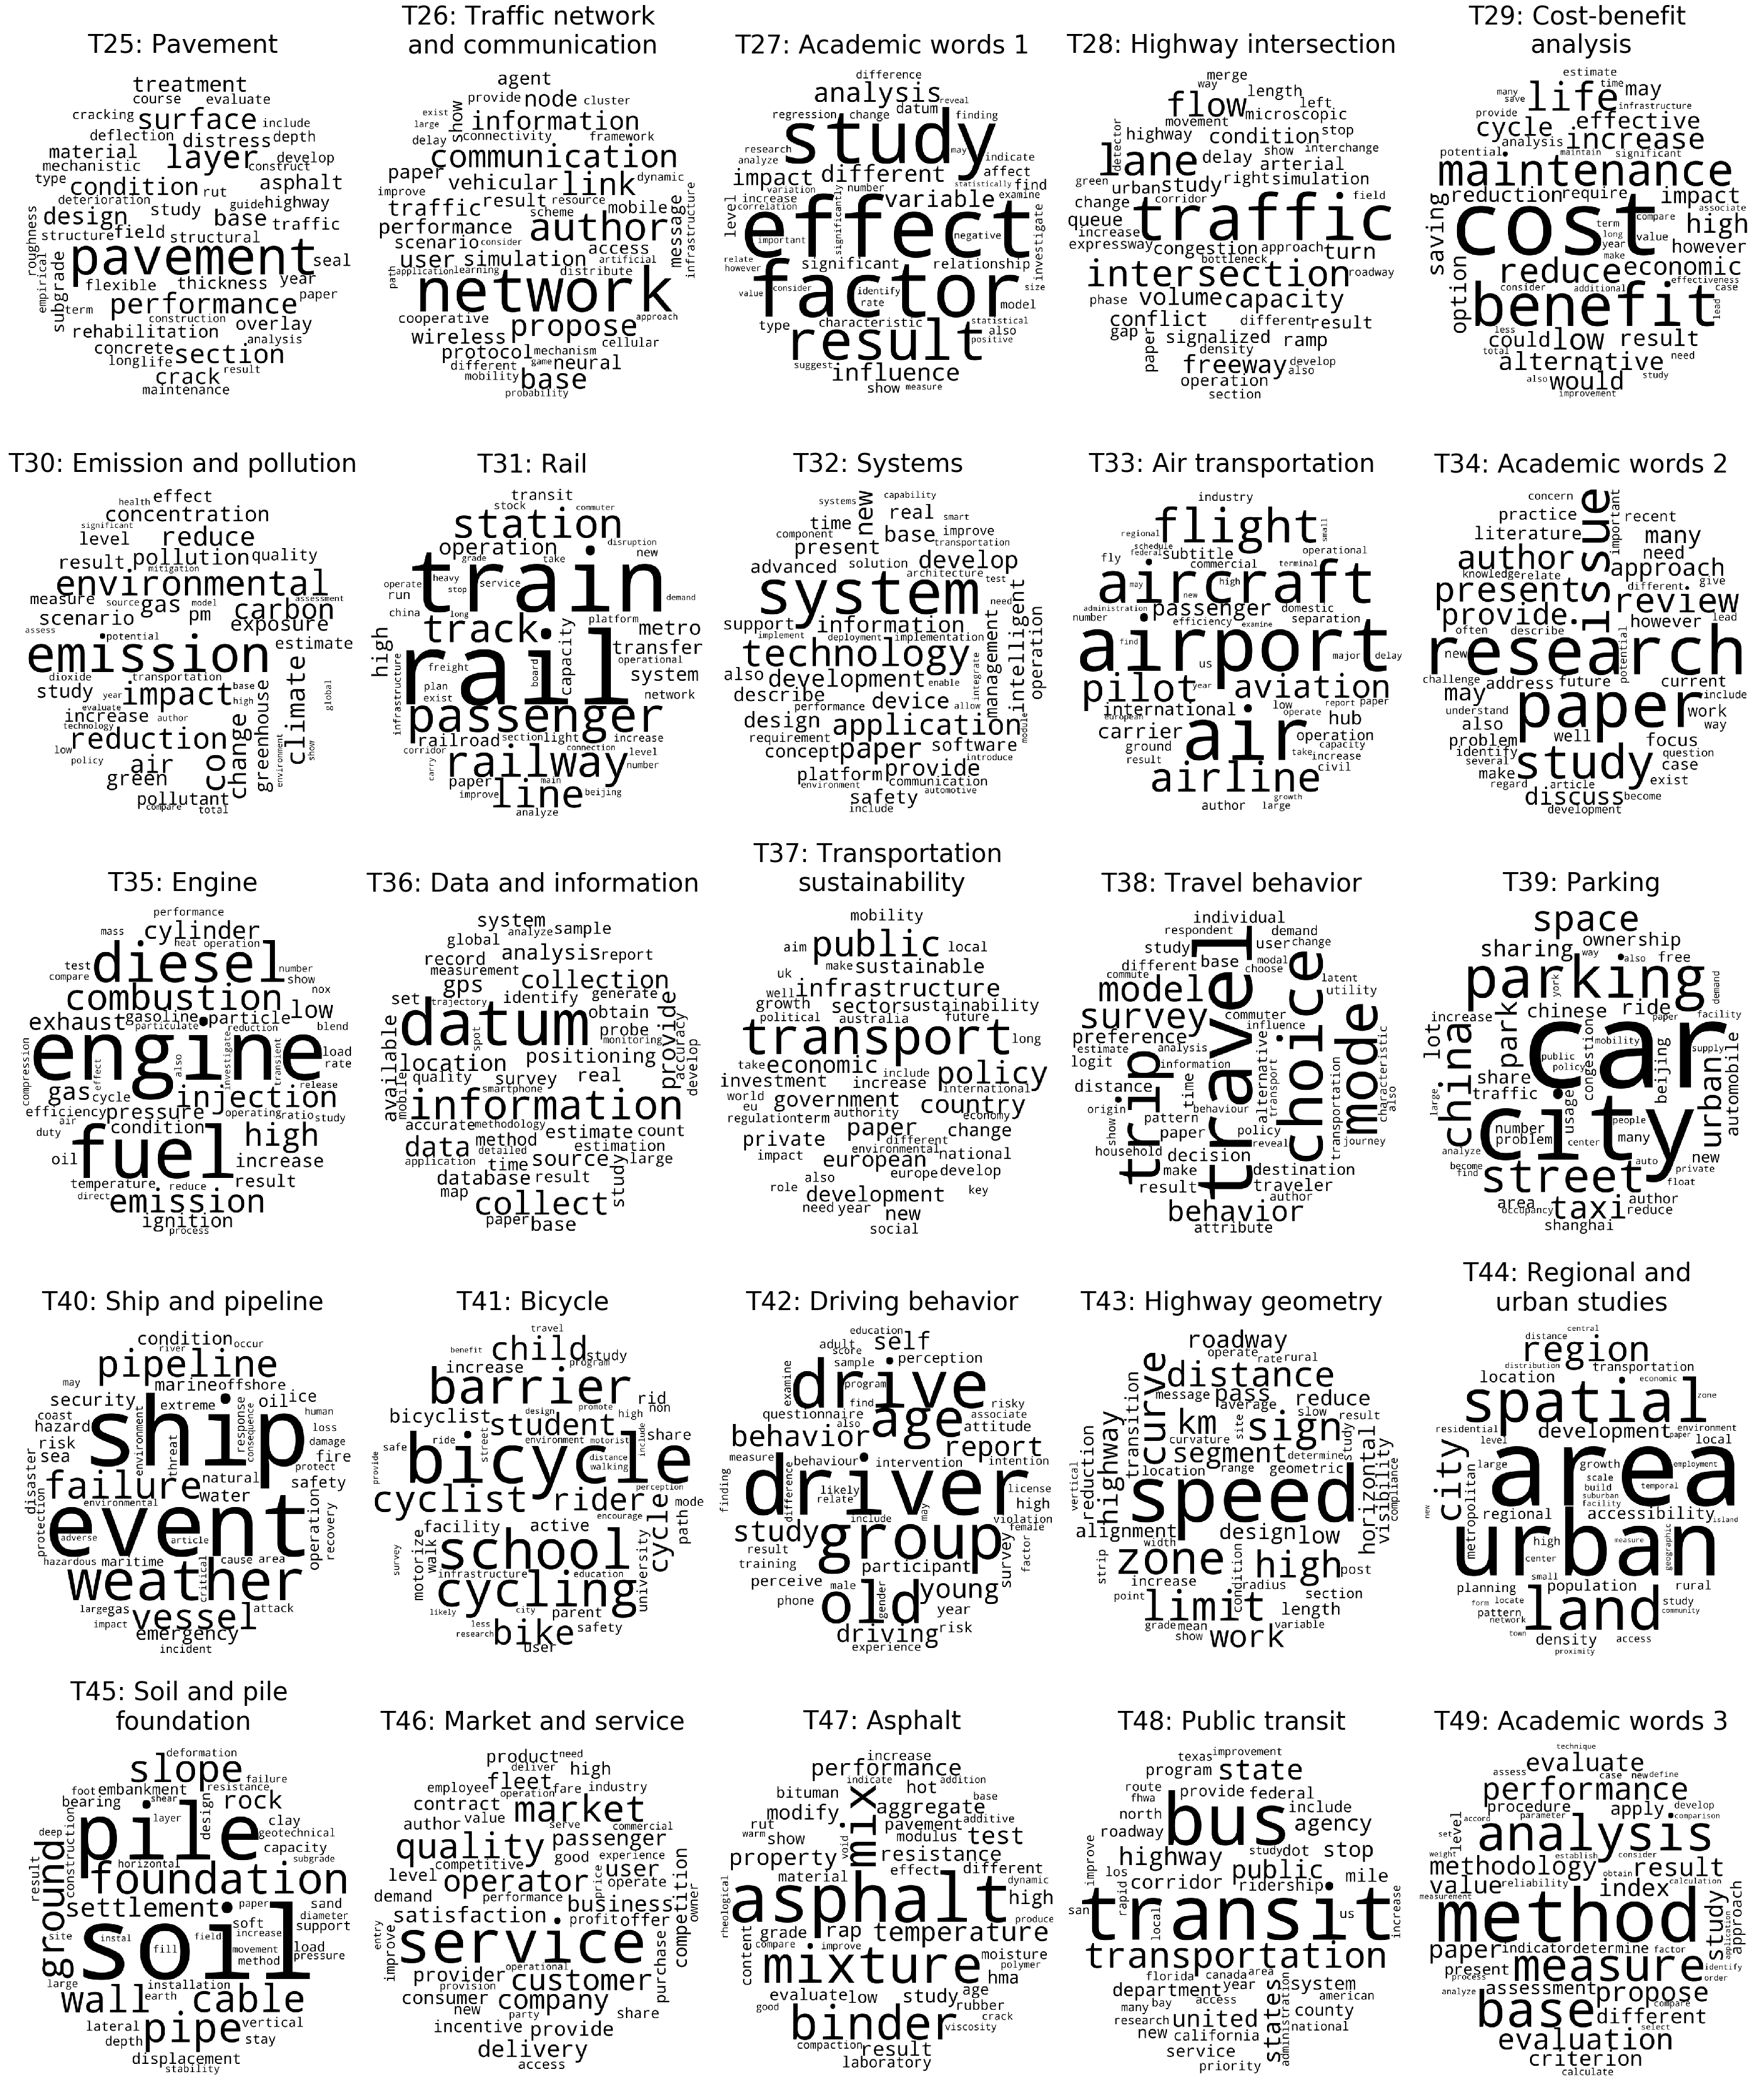

In [14]:
fig, axes = plt.subplots(nrows = 5, ncols=5, figsize=(50,50))

for i, ax in enumerate(axes.flat):
    i = i+25
    ax.axis('off')
    raw_image = Image.open('fig/wordcloud/word_cloud_'+str(i)+'.png')
    #image = mpimg.imread('wordcloud/word_cloud_'+i+'.png')
    ax.imshow(raw_image)
    #ax.set_xlabel("Topic "+str(i))
    
    ax.set_title("T"+str(i)+": "+t[i], fontsize=40)
    
    
fig.subplots_adjust(left=None, bottom=None, right=None, top=1.05,  wspace=-.02, hspace=0)
plt.savefig("Topic_25_49_combined_v2.svg", format="svg", bbox_inches = 'tight',
    pad_inches = 0, dpi = 200)
plt.show()
